**Библиотеки**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

2. Вывести в табличной форме статистику по датасету, включая
- Размерность всего датасета
- Количество признаков
- Количество целевых классов и объектов в каждом из классов
- Процент объектов с неопределенными признаками
- Иные ключевые характеристики датасета

Выбрать три класса и четыре количественных (недискретных) признака.
Сформировать на их основе «отфильтрованный» датасет для дальнейшего
анализа, удалив из датасета все объекты, для которых не определены значения
хотя бы одного из выбранных четырех количественных признаков.

In [48]:
dataset = sns.load_dataset('iris')
dataset_size = dataset.shape
features_count = dataset.shape[1] - 1
features = dataset.columns[:-1].tolist()
classes_count = dataset['species'].value_counts()
non_type_percent = dataset.isnull().mean() * 100
other = dataset.describe()

print(f'1. Размерность всего датасета: {dataset_size}')
print(f'2. Количество признаков: {features_count}')
print(f'Признаки: {features}')
print(f'3. Количество целевых классов и объектов в каждом из классов:\n{classes_count}')
print(f'4. Процент объектов с неопределенными признаками:\n{non_type_percent}')
print(f'5. Иные ключевые характеристики датасета:\n{other}')

1. Размерность всего датасета: (150, 5)
2. Количество признаков: 4
Признаки: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
3. Количество целевых классов и объектов в каждом из классов:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
4. Процент объектов с неопределенными признаками:
sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64
5. Иные ключевые характеристики датасета:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.

3. Выполнить визуализацию датасета по всем парам выбранных количественных
переменных, обозначая:
- в графиках с разными парами переменных объекты из разных классов
различными по форме и цвету точками,
- в графиках с одной и той же парой переменных – гистограммы с достаточным
числом разбиений (обычно – не менее 20), либо плотности распределения
переменной по оси признака.

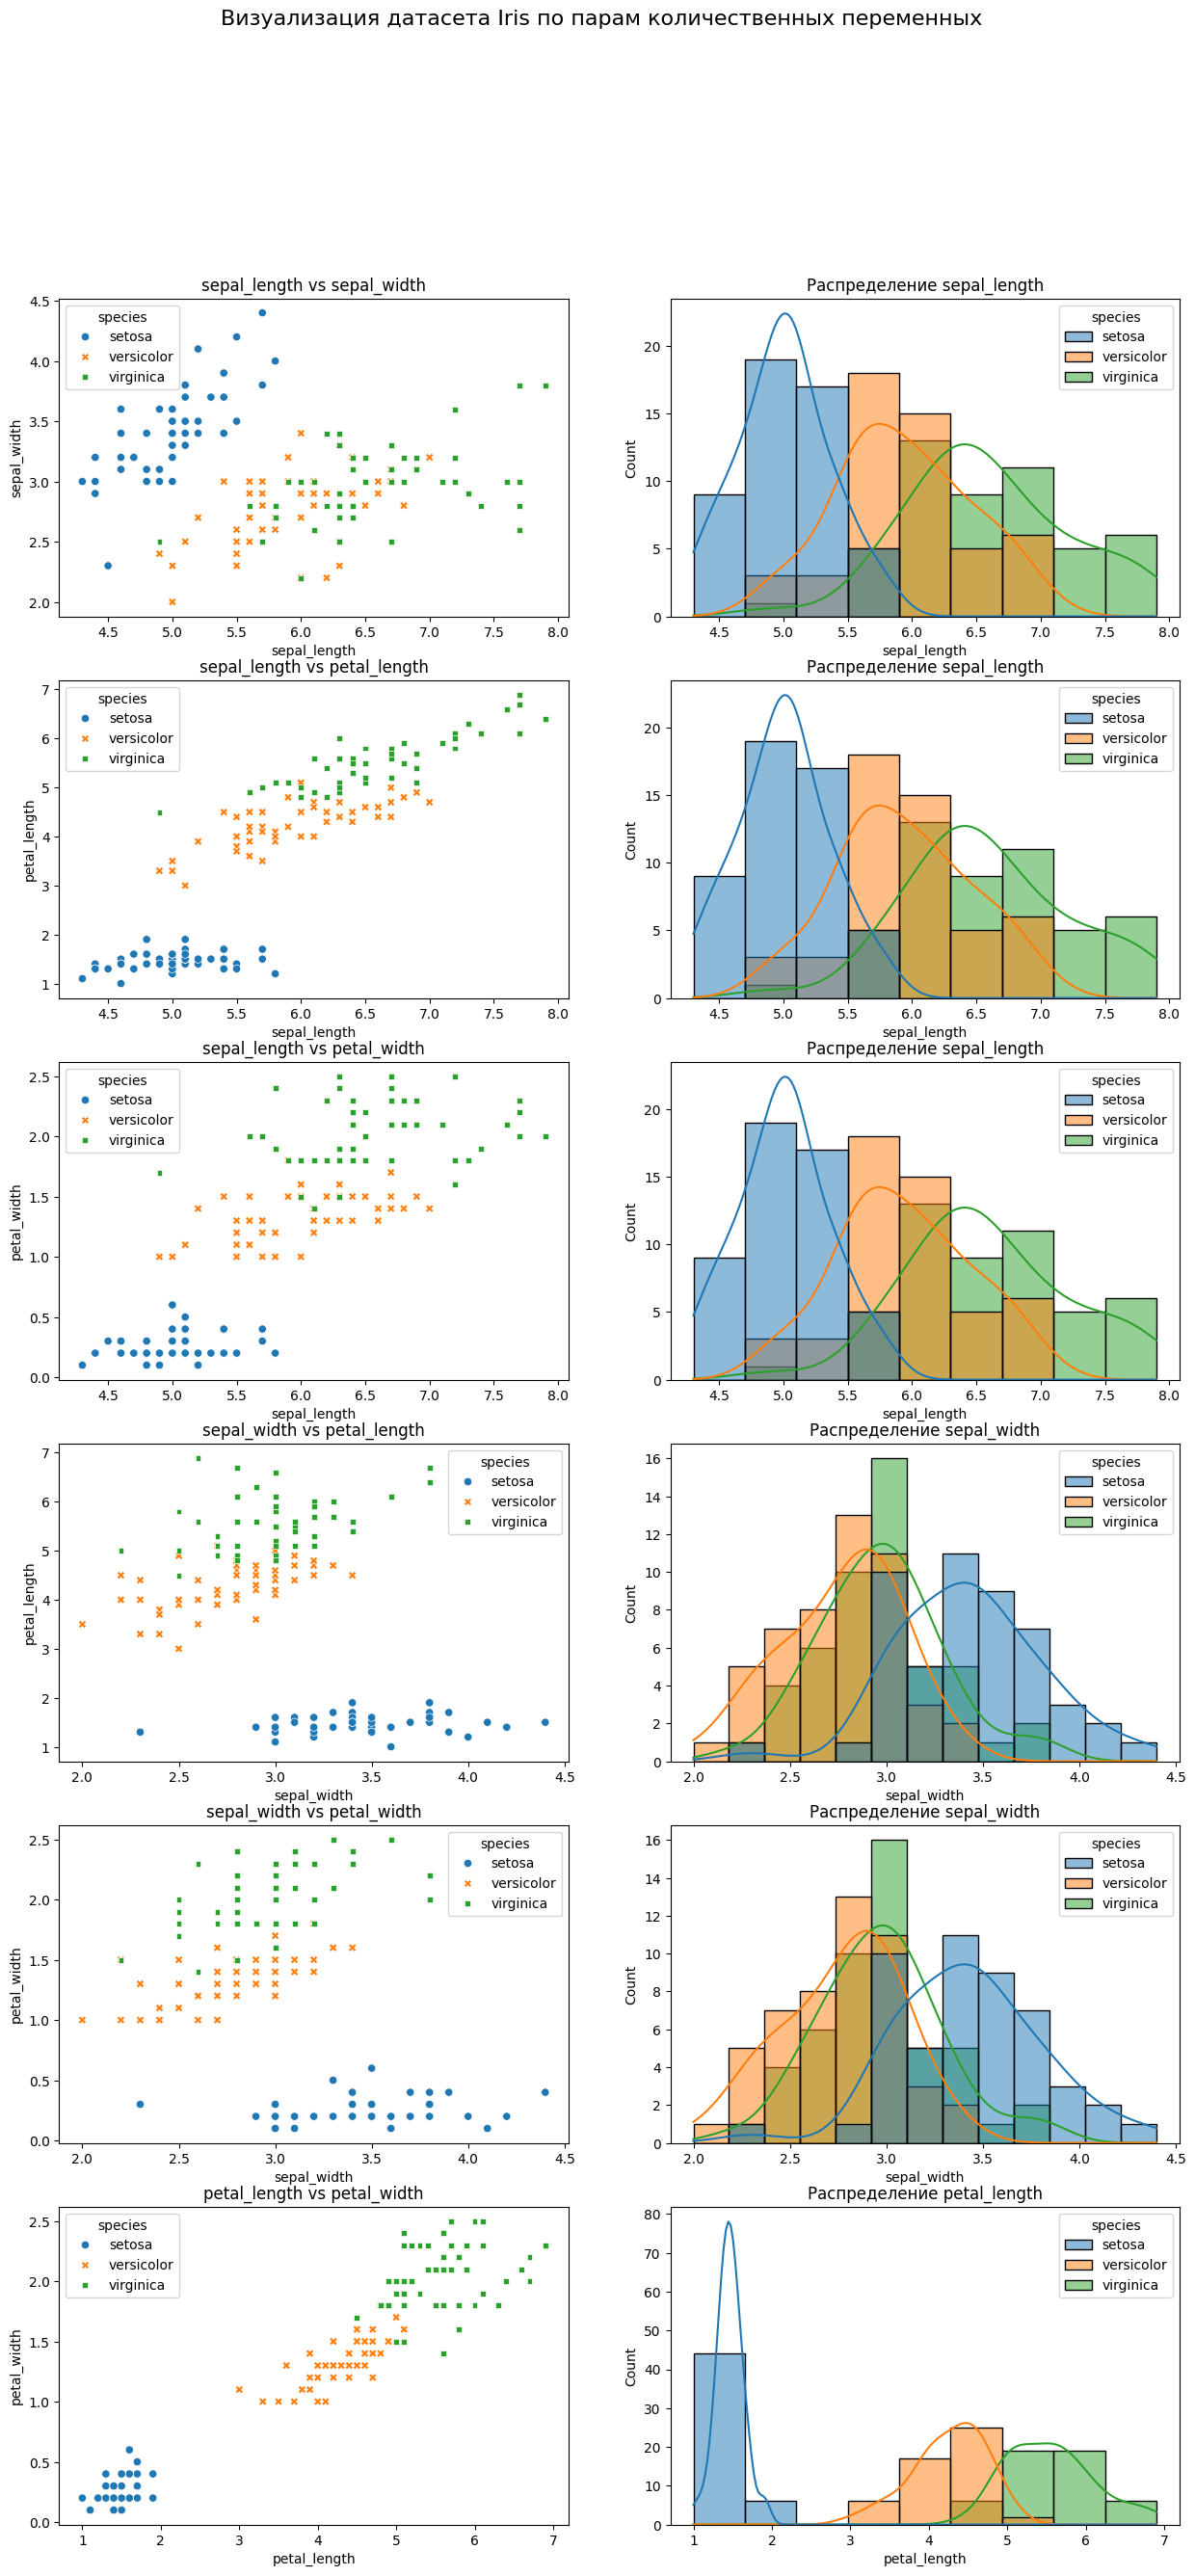

In [49]:
qu_features = features
pairs_of_qu = [(qu_features[i], qu_features[j]) for i in range (len(qu_features)) for j in range(i+1, len(qu_features))]
# print(pairs_of_qu)

fig, axes = plt.subplots(len(pairs_of_qu), 2, figsize=(15, 30))
fig.suptitle('Визуализация датасета Iris по парам количественных переменных', fontsize=16)

for idx, (x_pair, y_pair) in enumerate(pairs_of_qu):
    ax1 = axes[idx, 0]
    sns.scatterplot(data=dataset, x=x_pair, y=y_pair, hue='species', style='species', ax=ax1)
    ax1.set_title(f'{x_pair} vs {y_pair}')

    ax2 = axes[idx, 1]
    sns.histplot(data=dataset, x=x_pair, hue='species', kde=True, ax=ax2)
    ax2.set_title(f'Распределение {x_pair}')

4. В табличном варианте оценить степень сопряженности пар признаков переменных на всем датасете, используя коэффициент корреляции Пирсона.
В табличном варианте оценить степень сопряженности пар признаков-переменных
в каждом классе датасета, используя коэффициент корреляции Пирсона.

Коэффициент корреляции Пирсона для всего датасета:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000



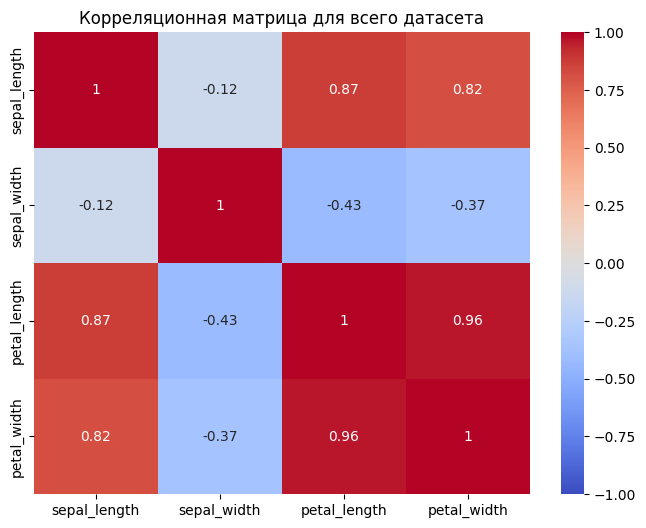

In [50]:
correlation_matrix_all = dataset[qu_features].corr(method='pearson')
print("Коэффициент корреляции Пирсона для всего датасета:")
print(correlation_matrix_all)
print()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица для всего датасета')
plt.show()

Коэффициент корреляции Пирсона для класса 'setosa':



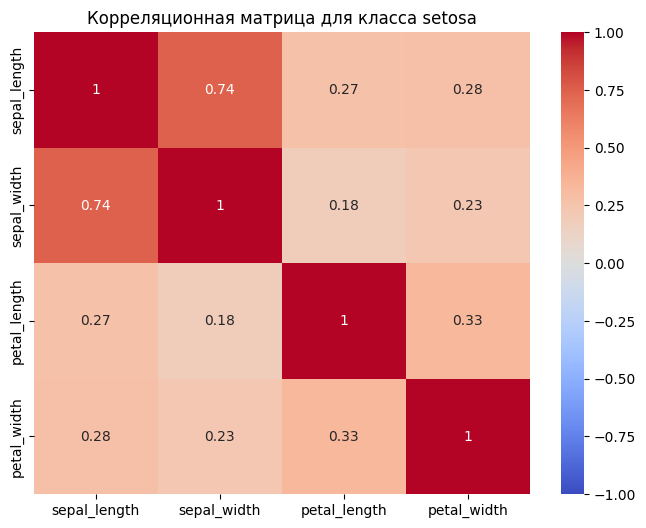

Коэффициент корреляции Пирсона для класса 'versicolor':



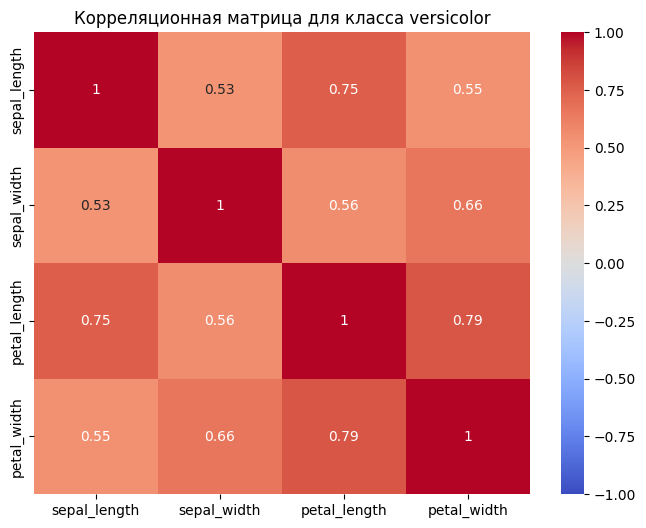

Коэффициент корреляции Пирсона для класса 'virginica':



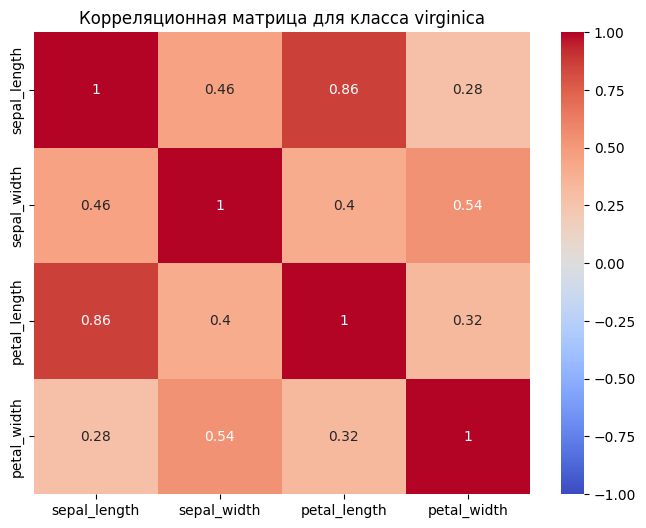

In [51]:
classes = dataset['species'].unique()

for c in classes:
    subset = dataset[dataset['species'] == c]
    correlation_matrix_class = subset[qu_features].corr(method='pearson')
    print(f"Коэффициент корреляции Пирсона для класса '{c}':")
    print(correlation_matrix_class.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1))
    print()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix_class, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Корреляционная матрица для класса {c}')
    plt.show()

5. Выбрать пару целевых классов и все количественные признаки.
Используя метод LDA (линейный дискриминантный анализ), построить решающую
функцию алгоритма, разграниченные решающей функцией зоны и отдельные
объекты классов на всех парах количественных признаков.

6. Для одной из пар количественных признаков из пункта 5 на одном рисунке
одновременно построить (а) решающую функцию LDA и (б) линейную регрессию
одного количественного признака от другого.

<ipython-input-55-0e34eb7c9d85>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_iris['species'] = filtered_iris['species'].map({'setosa': 0, 'versicolor': 1})
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


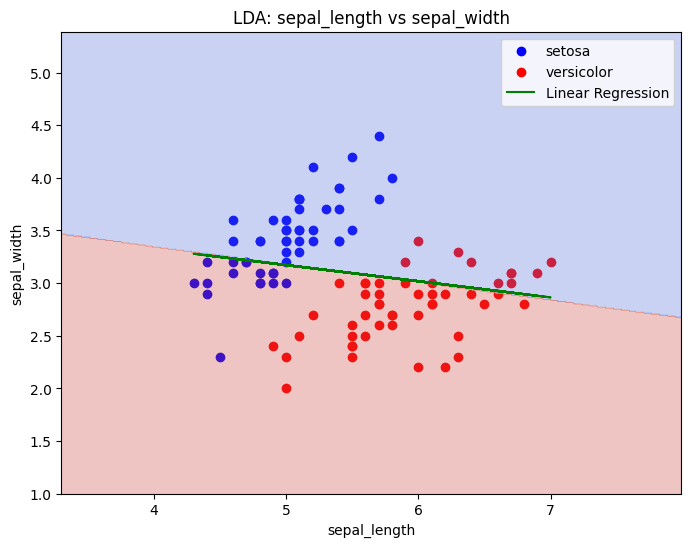

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


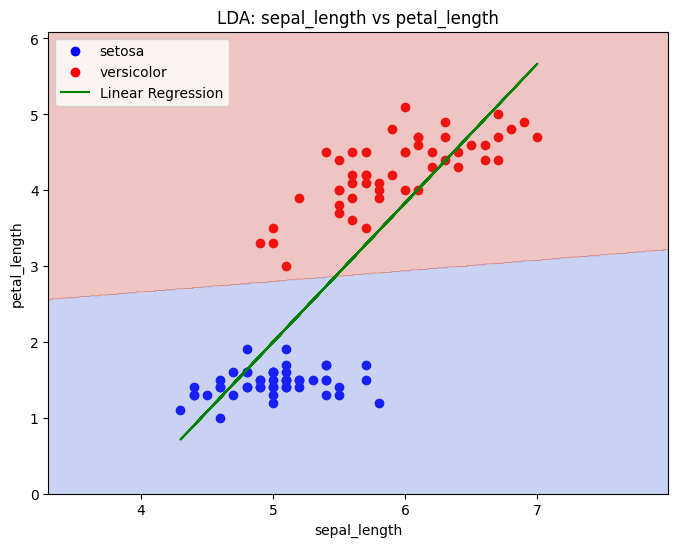

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


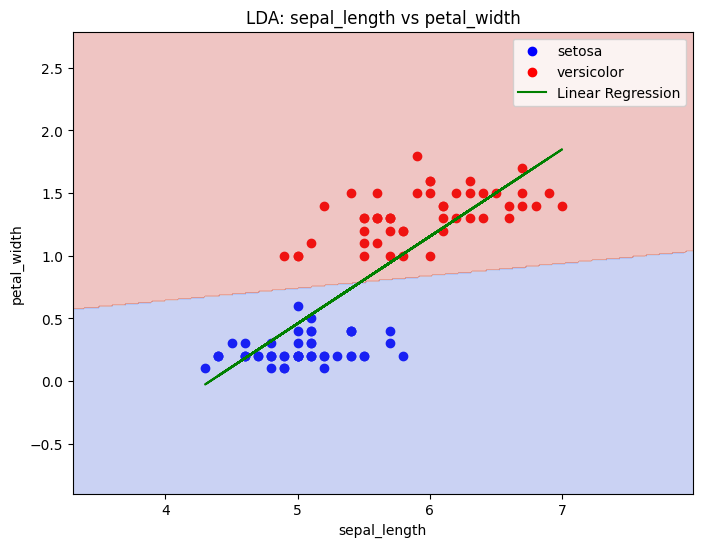

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


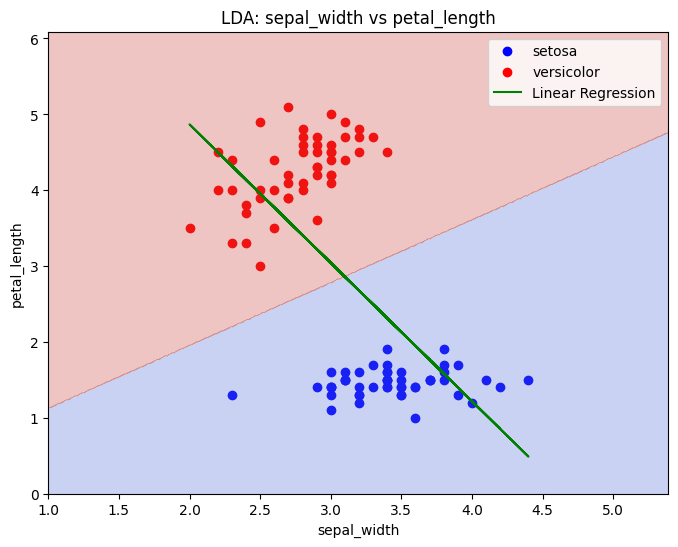

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


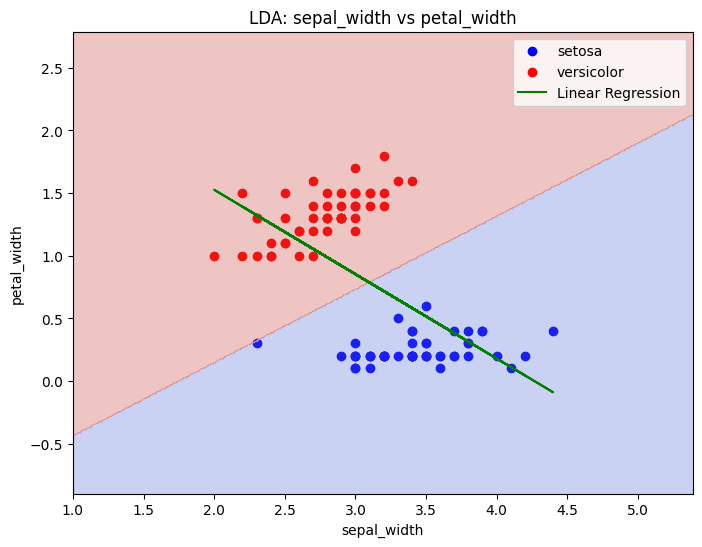

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


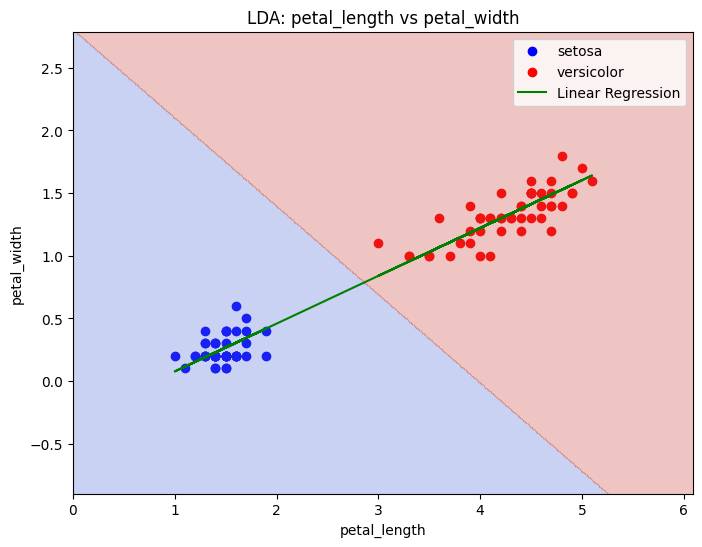

In [55]:
selected_classes = ['setosa', 'versicolor']
qu_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

filtered_iris = dataset[dataset['species'].isin(selected_classes)]

filtered_iris['species'] = filtered_iris['species'].map({'setosa': 0, 'versicolor': 1})

X = filtered_iris[qu_features]
y = filtered_iris['species']

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

pairs = [(qu_features[i], qu_features[j]) for i in range(len(qu_features)) for j in range(i + 1, len(qu_features))]

for x_var, y_var in pairs:
    plt.figure(figsize=(8, 6))

    class0 = filtered_iris[filtered_iris['species'] == 0]
    class1 = filtered_iris[filtered_iris['species'] == 1]

    plt.scatter(class0[x_var], class0[y_var], color='blue', label='setosa')
    plt.scatter(class1[x_var], class1[y_var], color='red', label='versicolor')

    x_min, x_max = filtered_iris[x_var].min() - 1, filtered_iris[x_var].max() + 1
    y_min, y_max = filtered_iris[y_var].min() - 1, filtered_iris[y_var].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    fixed_values = filtered_iris[qu_features].mean().values
    grid_points = np.zeros((xx.size, len(qu_features)))

    grid_points[:, qu_features.index(x_var)] = xx.ravel()
    grid_points[:, qu_features.index(y_var)] = yy.ravel()

    for feature in qu_features:
        if feature not in [x_var, y_var]:
            grid_points[:, qu_features.index(feature)] = fixed_values[qu_features.index(feature)]

    Z = lda.predict(grid_points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    X_reg = filtered_iris[[x_var]]
    y_reg = filtered_iris[y_var]

    reg = LinearRegression()
    reg.fit(X_reg, y_reg)

    y_pred = reg.predict(X_reg)

    plt.plot(X_reg, y_pred, color='green', label='Linear Regression')

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f'LDA: {x_var} vs {y_var}')
    plt.legend()
    plt.show()

7. Выбрать два количественных признака и пару целевых классов
На отдельных рисунках с осями количественных признаков построить решающие
функции, разграниченные решающей функцией зоны и отдельные объекты
классов для методов (а) LDA, (б) SVM, (в) логистическая регрессия, (г) наивный
байесовский классификатор.

<ipython-input-56-ed685d7a5455>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_iris['species'] = filtered_iris['species'].map({'setosa': 0, 'versicolor': 1})
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


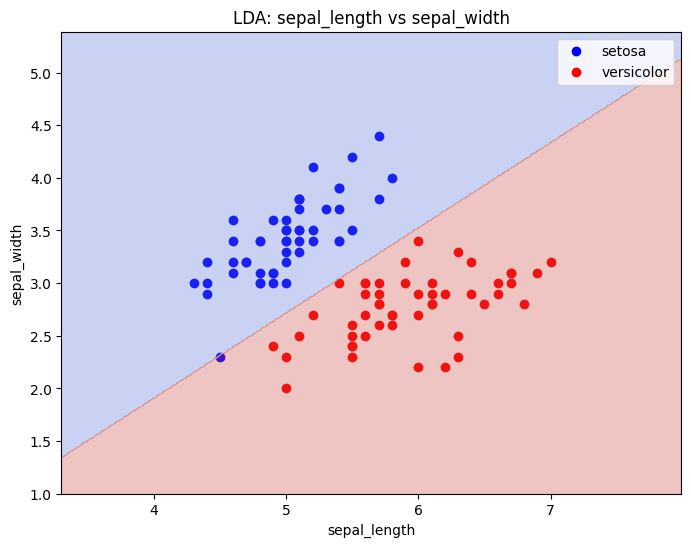

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


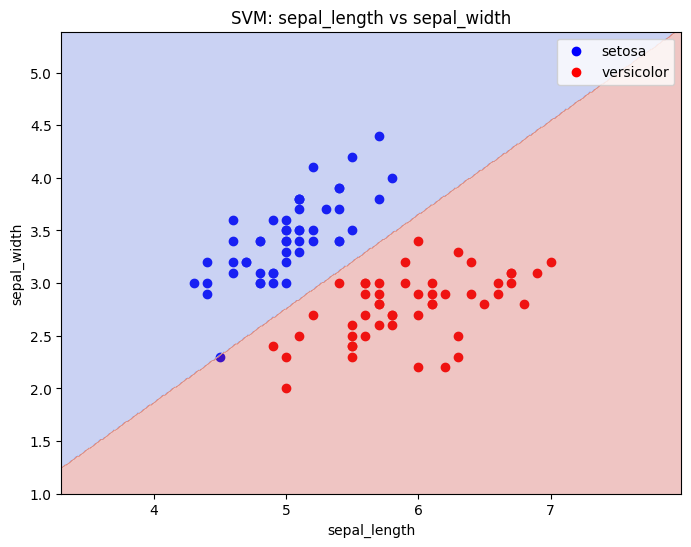

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


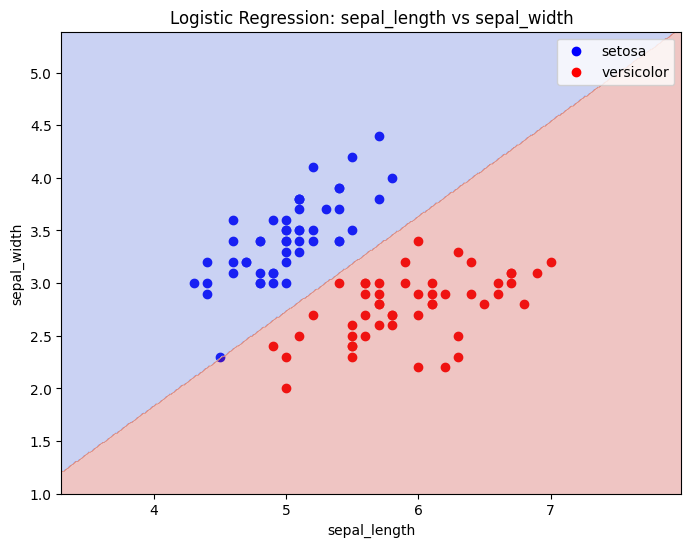

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


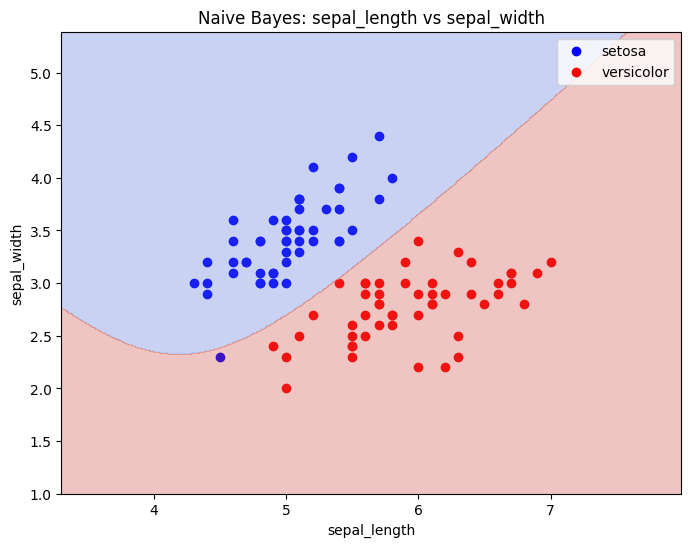

In [56]:
selected_classes = ['setosa', 'versicolor']
qu_features = ['sepal_length', 'sepal_width']

filtered_iris = dataset[dataset['species'].isin(selected_classes)]

filtered_iris['species'] = filtered_iris['species'].map({'setosa': 0, 'versicolor': 1})

X = filtered_iris[qu_features]
y = filtered_iris['species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

methods = {
    'LDA': LinearDiscriminantAnalysis(),
    'SVM': SVC(kernel='linear', probability=True),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
}

for method_name, method in methods.items():
    plt.figure(figsize=(8, 6))

    class0 = filtered_iris[filtered_iris['species'] == 0]
    class1 = filtered_iris[filtered_iris['species'] == 1]

    plt.scatter(class0[qu_features[0]], class0[qu_features[1]], color='blue', label='setosa')
    plt.scatter(class1[qu_features[0]], class1[qu_features[1]], color='red', label='versicolor')

    x_min, x_max = filtered_iris[qu_features[0]].min() - 1, filtered_iris[qu_features[0]].max() + 1
    y_min, y_max = filtered_iris[qu_features[1]].min() - 1, filtered_iris[qu_features[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    if method_name in ['SVM', 'Logistic Regression']:
        method.fit(X_scaled, y)
        Z = method.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:
        method.fit(X, y)
        Z = method.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    plt.xlabel(qu_features[0])
    plt.ylabel(qu_features[1])
    plt.title(f'{method_name}: {qu_features[0]} vs {qu_features[1]}')
    plt.legend()
    plt.show()

8. Выбрать целевой класс и для каждого метода из пункта 7:
- Вывести матрицу ошибок.
- Вывести значения sensitivity, specificity, precision, recall.
- Построить ROC кривую и рассчитать метрику AUC.

Method: LDA
Confusion Matrix:
[[17  0]
 [ 0 13]]
Classification Report:
Sensitivity (Recall): 1.00
Specificity: 1.00
Precision: 1.00
Recall: 1.00


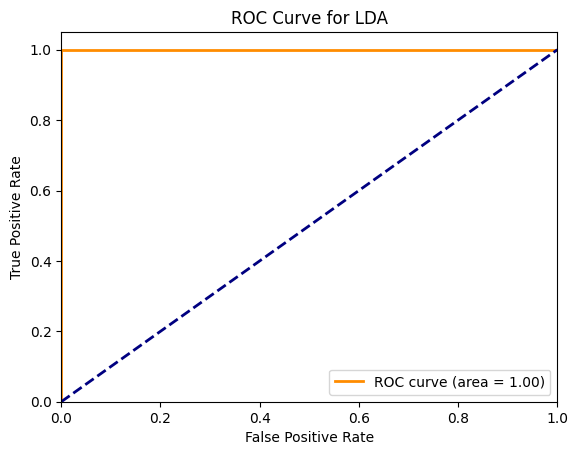



Method: SVM
Confusion Matrix:
[[17  0]
 [ 0 13]]
Classification Report:
Sensitivity (Recall): 1.00
Specificity: 1.00
Precision: 1.00
Recall: 1.00


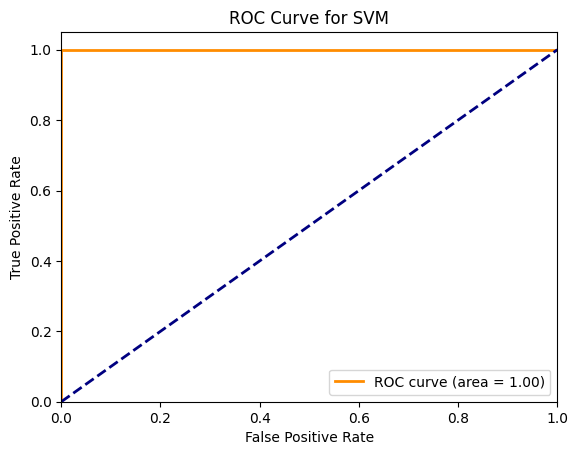



Method: Logistic Regression
Confusion Matrix:
[[17  0]
 [ 0 13]]
Classification Report:
Sensitivity (Recall): 1.00
Specificity: 1.00
Precision: 1.00
Recall: 1.00


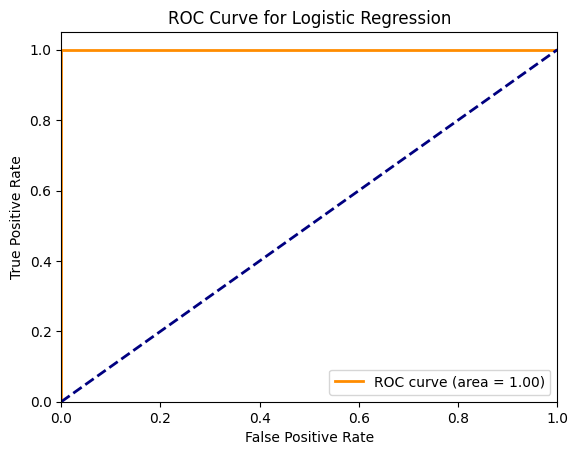



Method: Naive Bayes
Confusion Matrix:
[[17  0]
 [ 0 13]]
Classification Report:
Sensitivity (Recall): 1.00
Specificity: 1.00
Precision: 1.00
Recall: 1.00


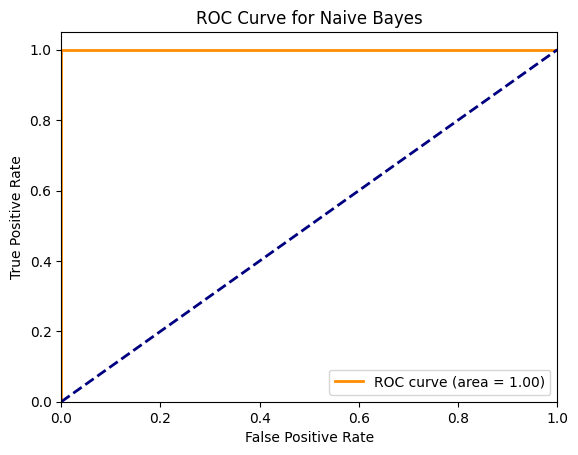

In [57]:
selected_classes = ['setosa', 'versicolor']
qu_features = ['sepal_length', 'sepal_width']

X = filtered_iris[qu_features]
y = filtered_iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

methods = {
    'LDA': LinearDiscriminantAnalysis(),
    'SVM': SVC(kernel='linear', probability=True),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
}

for method_name, method in methods.items():
    print(f"Method: {method_name}")

    if method_name in ['SVM', 'Logistic Regression']:
        method.fit(X_train_scaled, y_train)
        y_pred = method.predict(X_test_scaled)
        y_prob = method.predict_proba(X_test_scaled)[:, 1]
    else:
        method.fit(X_train, y_train)
        y_pred = method.predict(X_test)
        y_prob = method.predict_proba(X_test)[:, 1]

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    class_report = classification_report(y_test, y_pred, target_names=selected_classes, output_dict=True)
    print("Classification Report:")
    print(f"Sensitivity (Recall): {class_report['versicolor']['recall']:.2f}")
    print(f"Specificity: {class_report['setosa']['recall']:.2f}")
    print(f"Precision: {class_report['versicolor']['precision']:.2f}")
    print(f"Recall: {class_report['versicolor']['recall']:.2f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {method_name}')
    plt.legend(loc="lower right")
    plt.show()

    print("\n" + "="*50 + "\n")